In [278]:
import os
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sn

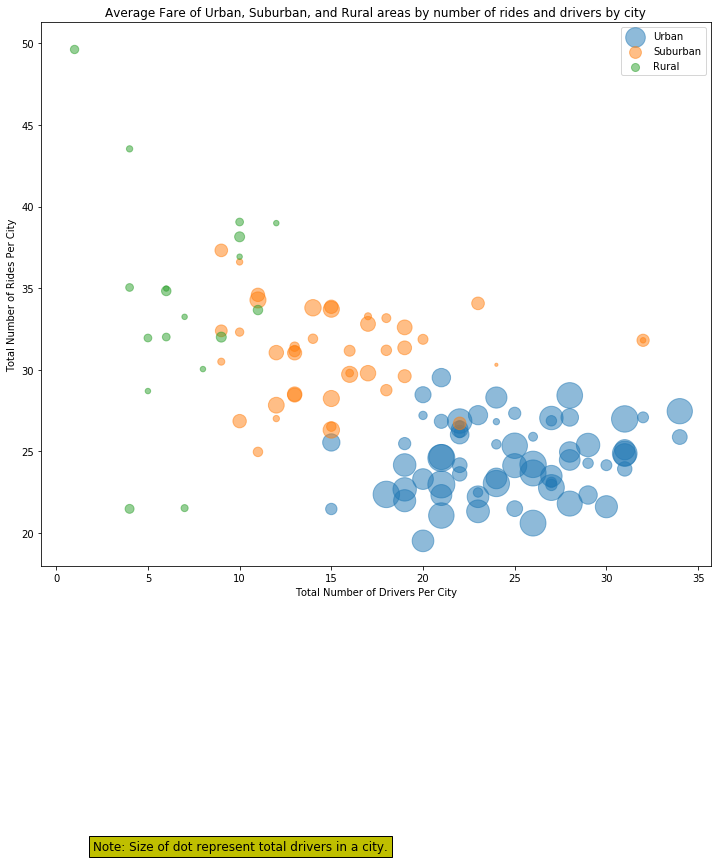

In [282]:
city_file = os.path.join('raw_data', 'city_data.csv')
df_city = pd.read_csv(city_file)

ride_file = os.path.join('raw_data', 'ride_data.csv')
df_ride = pd.read_csv(ride_file)

df_city = df_city.merge(
    df_ride.groupby('city')[['fare', 'ride_id']].agg(
        {
            'fare': 'mean',
            'ride_id': 'count',
        }
    ).reset_index().rename(
        columns={
             'fare': 'fare_average',
             'ride_id': 'ride_count',
        }
    ),
    on='city',
    how='left'
)


plt.figure(figsize=(12, 10))
plt.title('Average Fare of Urban, Suburban, and Rural areas by number of rides and drivers by city')
plt.xlabel('Total Number of Drivers Per City')
plt.ylabel('Total Number of Rides Per City')
plt.text(2, 0.6, 'Note: Size of dot represent total drivers in a city.',
         fontsize=12,
         bbox=dict(facecolor='y'))

plt.legend(
    handles=[
        plt.scatter(
            s=df_city[df_city['type'] == type]['driver_count'] * 10,
            x=df_city[df_city['type'] == type]['ride_count'],
            y=df_city[df_city['type'] == type]['fare_average'],
            alpha=0.5,
            label=type
        ) for type in df_city['type'].unique()
    ]    
)


plt.show()

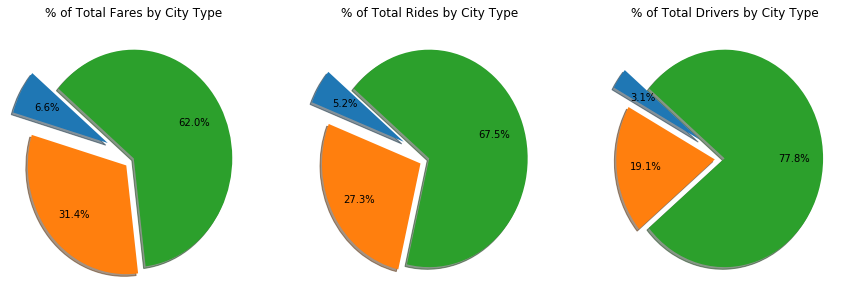

In [280]:
#plt.close()
df_city = df_city.merge(
    df_ride.groupby('city')['fare'].sum(
    ).to_frame().reset_index().rename(
        columns={
             'fare': 'fare_total',
        }
    ),
    on='city',
    how='left'
)         

plt.figure(figsize=(15, 5))
kwargs = {
    'startangle': 140,
    'explode': [0.3, 0.1, 0],
    'shadow': True,
    'pctdistance': 0.7,
    'autopct': '%1.1f%%' 
}

plt.subplot(131)
plt.title('% of Total Fares by City Type')
plt.pie(df_city.groupby('type')['fare_total'].sum(), **kwargs)

plt.subplot(132)
plt.title('% of Total Rides by City Type')
plt.pie(df_city.groupby('type')['ride_count'].sum(), **kwargs)

plt.subplot(133)
plt.title('% of Total Drivers by City Type')
plt.pie(df_city.groupby('type')['driver_count'].sum(), **kwargs)

plt.show()